# Prac 03. Part 1

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import gaussian
plt.rcParams['figure.figsize'] = [15, 10]

(<matplotlib.image.AxesImage at 0x2722caab8c0>, (-0.5, 643.5, 361.5, -0.5))

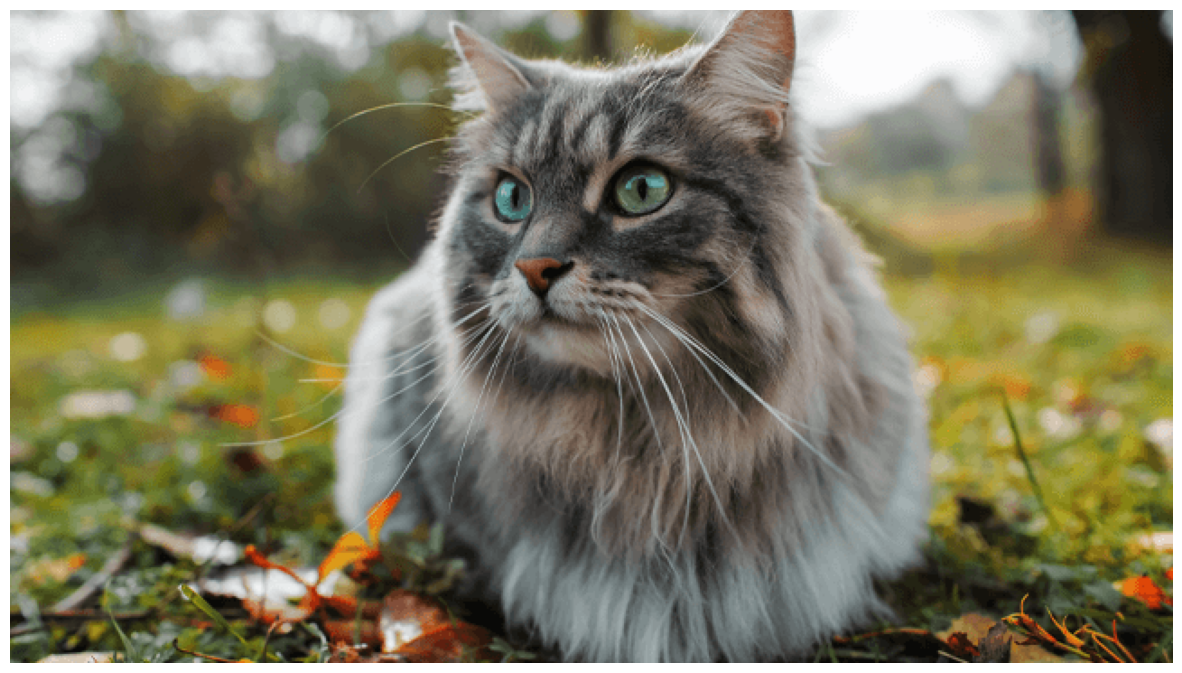

In [7]:
img = cv2.imread('../cat.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off')

(<Axes: >,
 (-0.5, 643.5, 361.5, -0.5))

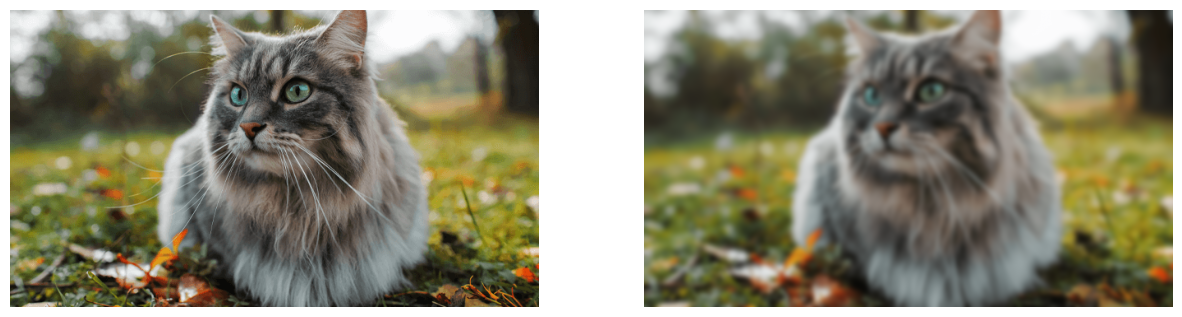

In [8]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = gaussian(img, sigma=3, channel_axis=-1)

plt.subplot(121), plt.imshow(img), plt.axis('off')
plt.subplot(122), plt.imshow(unsharp), plt.axis('off')

(<Axes: >,
 (-0.5, 643.5, 361.5, -0.5))

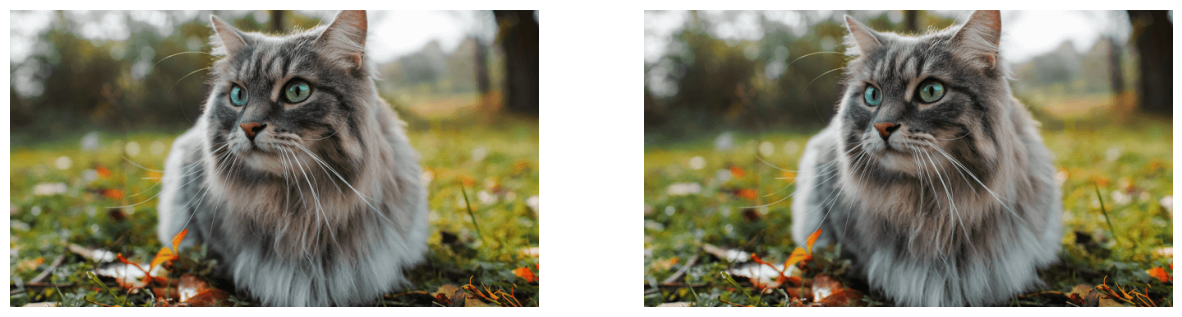

In [9]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = np.clip(img - unsharp, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.axis('off')
plt.subplot(122), plt.imshow(diff), plt.axis('off')

(<Axes: >,
 (-0.5, 643.5, 361.5, -0.5))

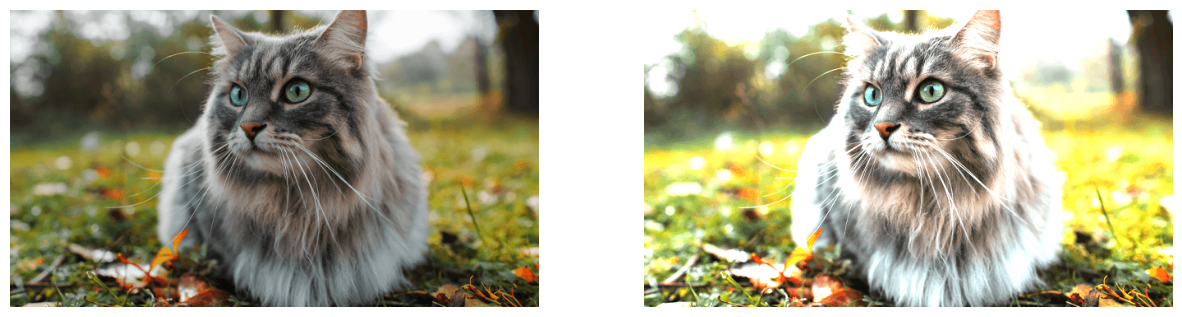

In [10]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 0.75
sharpened = np.clip(img + (diff * amount), 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.axis('off')
plt.subplot(122), plt.imshow(sharpened), plt.axis('off')

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?